# **1. Problem Statement**


-The objective of this exploratory data analysis (EDA) is to uncover meaningful insights from Diwali sales data. This analysis aims to assist
businesses in understanding customer demographics, purchasing behaviors, and regional preferences during the Diwali festive season. The insights can 
be leveraged to optimize marketing strategies, inventory management, and sales forecasting.

# **2. Importing Libraries**

In [2]:
import numpy as np
                 
#--------------------------------------------------------------------------------
import pandas as pd
  
#--------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns            

#-------------------------------------------------------------------------------------------------------------------------------
from wordcloud import WordCloud                                     # To create wordclouds
from wordcloud import STOPWORDS                                     # To import a list of stopwords that remove unnecessary unicode text


# **3. Loading Data**


In [3]:
df= pd.read_csv("C:\python -files\Diwali Sales Data.csv",encoding=('ISO-8859-1'))
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# **4. Data Description**

In [ ]:
-The dataset consists of the following features:

|1|User_ID: A unique identifier for customers.|
|2|Cust_name: The name of the customer.|
|3|Product_ID: A unique identifier for products.|
|4|Gender: Customer gender (e.g., M/F).|
|5|Age Group: Categorical age ranges (e.g., 26-35).|
|6|Age: Numerical age of customers.|
|7|Marital_Status: Binary indicator (0 = single, 1 = married).|
|8|State: State of residence.|
|9|Zone: Regional zone (e.g., Western, Southern).|
|10|Occupation: Customer occupation category.|
|11|Product_Category: Product category purchased|
|12|Orders: Number of orders placed.|
|13|Amount: Transaction amount (some missing values exist).|
|14|Status: Unused column (all null).|

In [31]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Observations:**

- We have **4 int64 data type** features, **3 float64 data type** features and **8 object data type** features in the independent features.

- We can see a gist of missing values in the dataset. Let's see what the profiling report says:

# **5 Data Preprocessing**

## **Data Cleaning**

In [9]:
df.duplicated().sum()

np.int64(8)

In [10]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

- We have **succesfully imputed null values** and **removed** the **duplicated rows**.

In [14]:
## drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis= 1,inplace= True)

In [16]:
## check null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
## drop null values
df.dropna(inplace= True)

# **6. Exploratory Data Analysis**

**Gender**

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

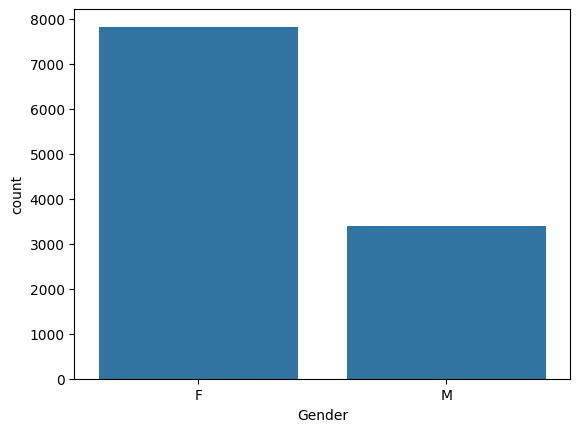

In [20]:
ax=sns.countplot(x="Gender",data= df)

<Axes: xlabel='Gender', ylabel='Amount'>

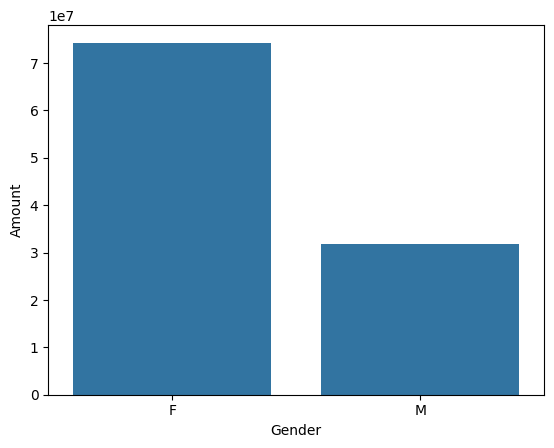

In [22]:
sales_gen= df.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

**From the above graphs we can see that most of the buyers are females and the purchasing power are greater than men**

***Age***

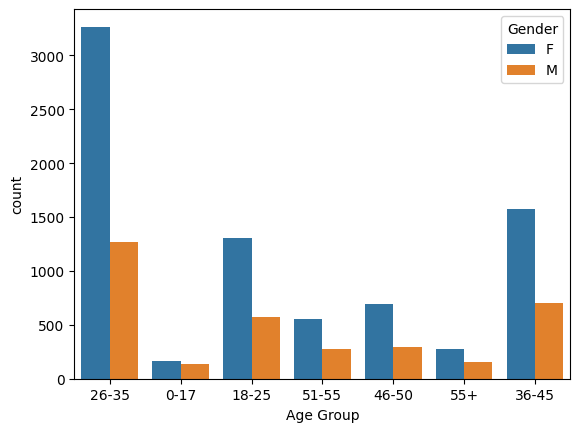

In [23]:
ax=sns.countplot(data=df,x='Age Group',hue= 'Gender')

<Axes: xlabel='Age Group', ylabel='Amount'>

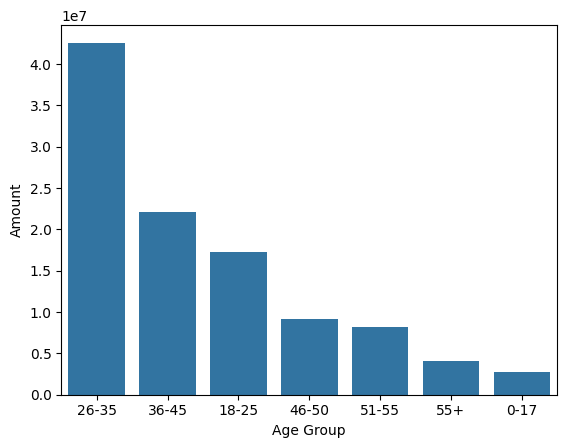

In [26]:
## Total Amount vs Age Group
sales_age= df.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data= sales_age)

- **From above graphs we can see that most of the buyers are of age group between 26-35 yrs female**

***State***

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

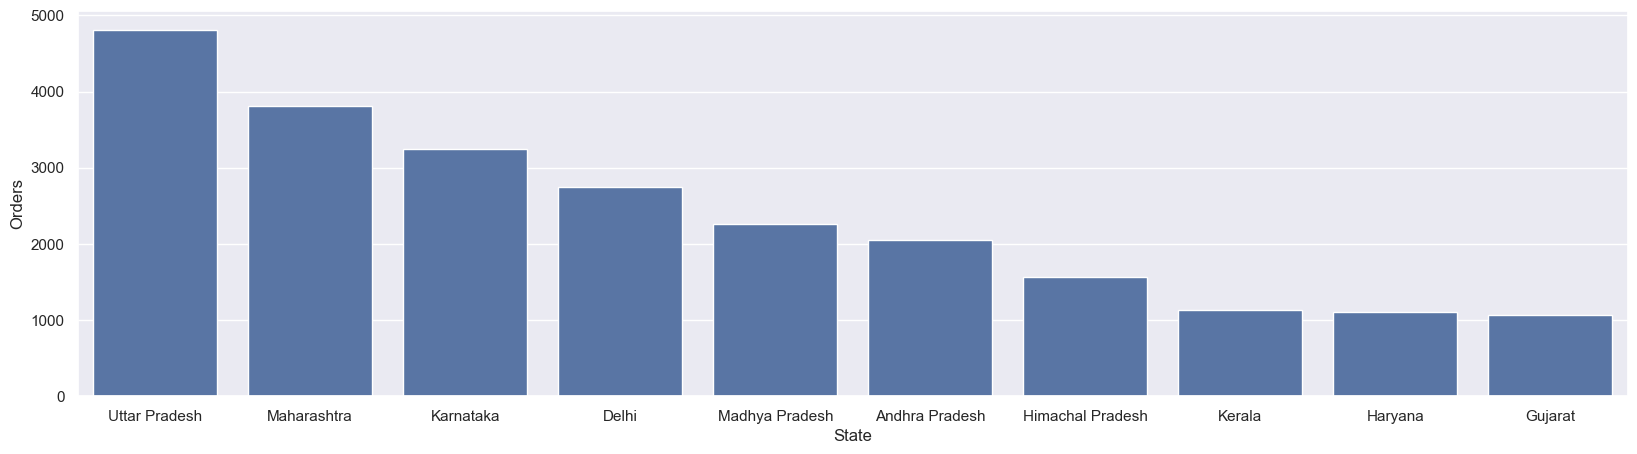

In [4]:
## Total number of orders from 10 states
sales_state= df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state,x='State', y='Orders')

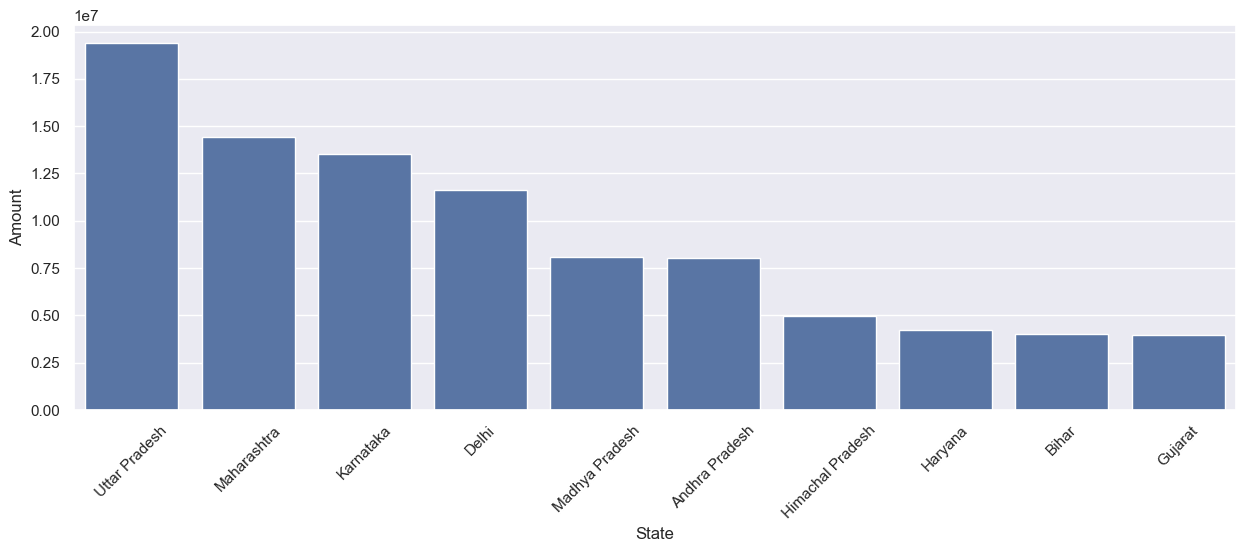

In [6]:
## Total Amount/ sales from 10 states
sales_state= df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= sales_state,x='State', y='Amount')
plt.xticks(rotation=45)
plt.show()

- **From above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh,Maharashtra and karnataka respectively but total sales/ amount is from UP ,Karnataka and then Maharashtra**

***Marital Status***

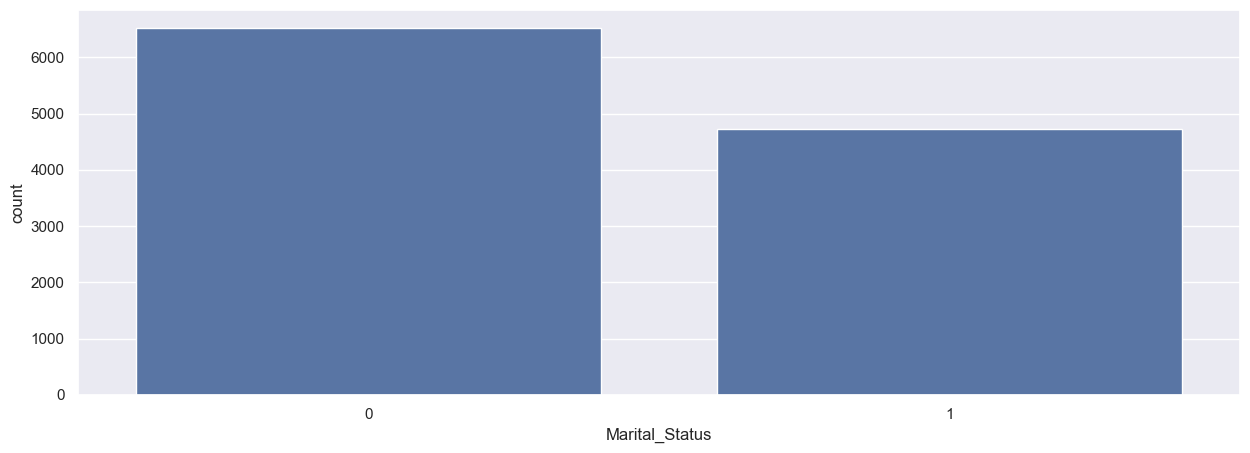

In [40]:
ax=sns.countplot(data=df,x= 'Marital_Status')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

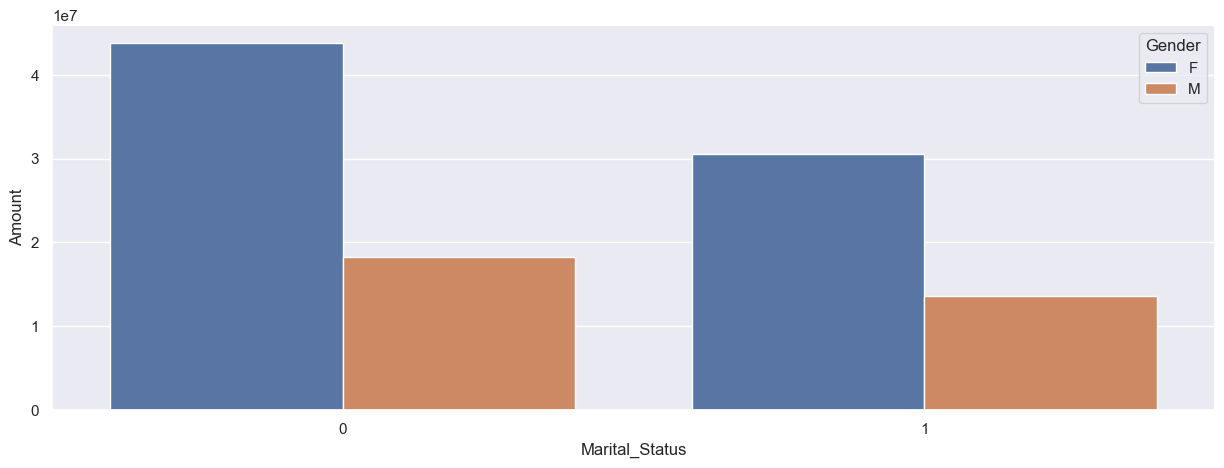

In [41]:
sales_state= df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= sales_state,x='Marital_Status', y='Amount',hue='Gender')

- **From above graphs we can say that most of the buyers are married(women) and they have high purchasing power.**

**Occupation**

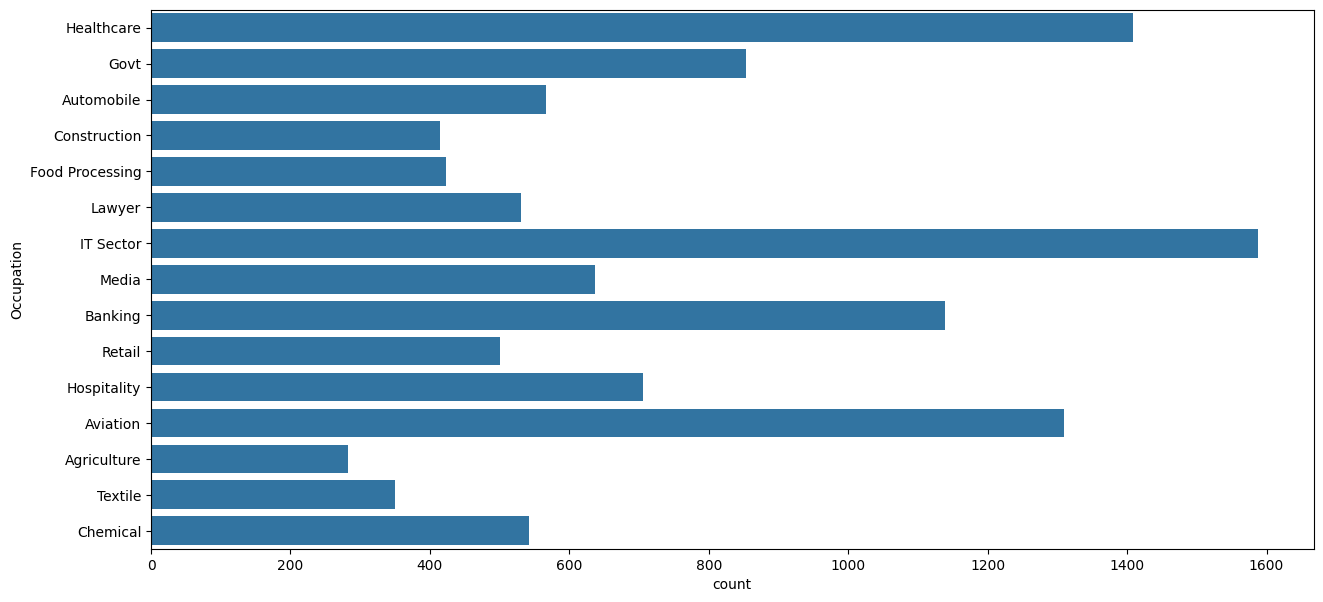

In [3]:
fig = plt.figure(figsize=(15,7))
sns.countplot(data=df, y='Occupation')
plt.show()

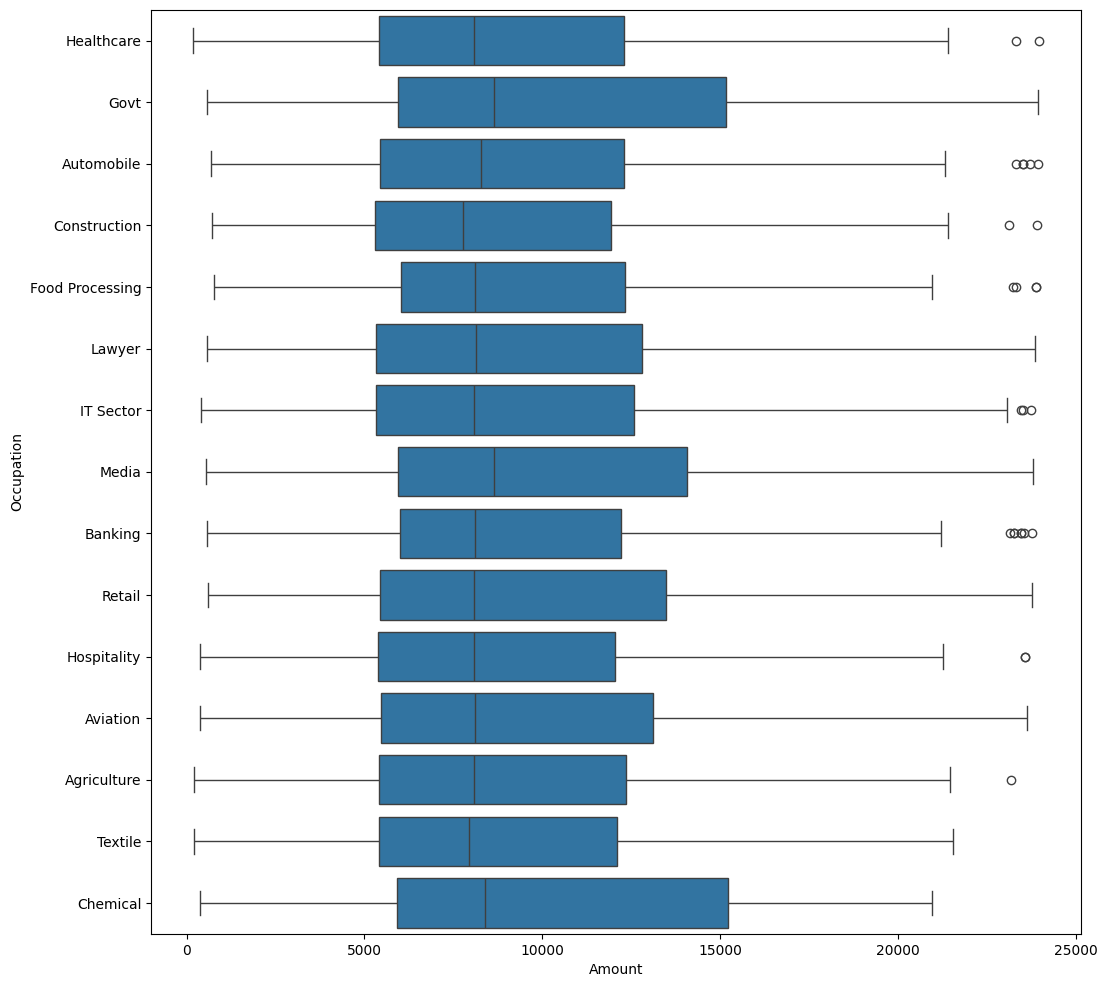

In [22]:

plt.figure(figsize=(12,12))
sns.boxplot(df,y = 'Occupation', x = 'Amount')
plt.show()

<Axes: xlabel='Occupation', ylabel='Amount'>

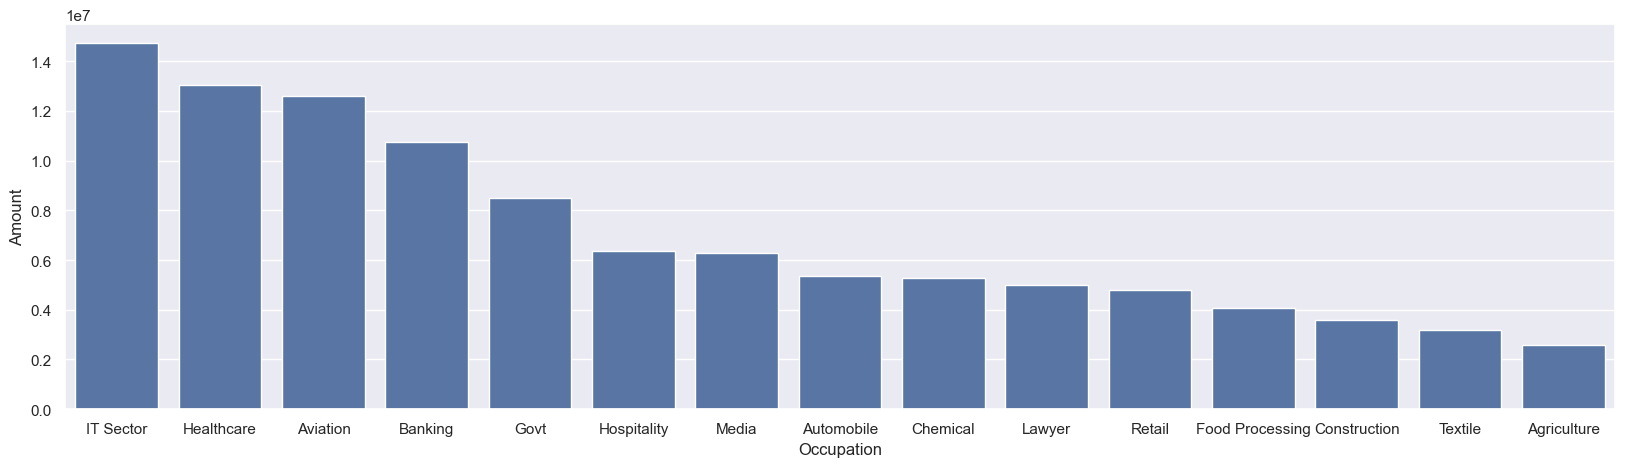

In [4]:
sales_state= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state,x='Occupation', y='Amount')

- **From the above graphs we can say that most of the workers are working in IT, Aviation and Healthcare Sector.**

**Product Category**

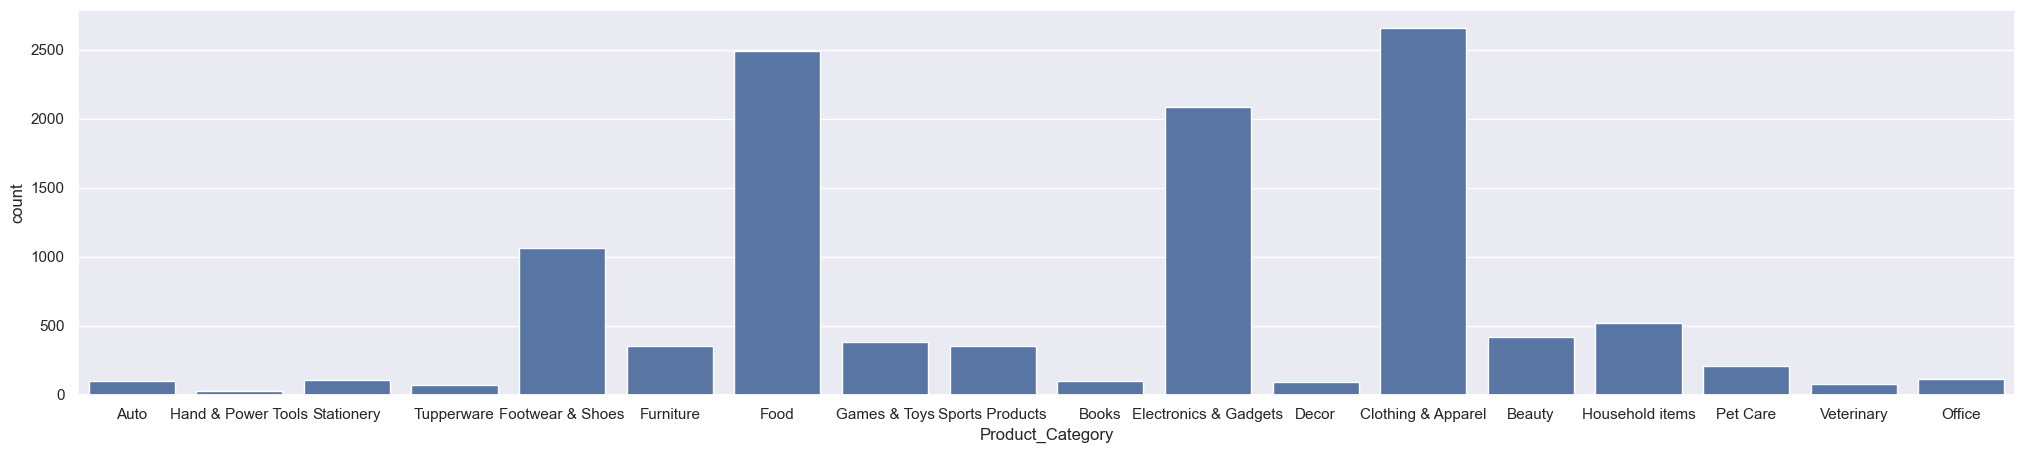

In [9]:
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.countplot(data= df,x='Product_Category')

<Axes: xlabel='Product_Category', ylabel='Amount'>

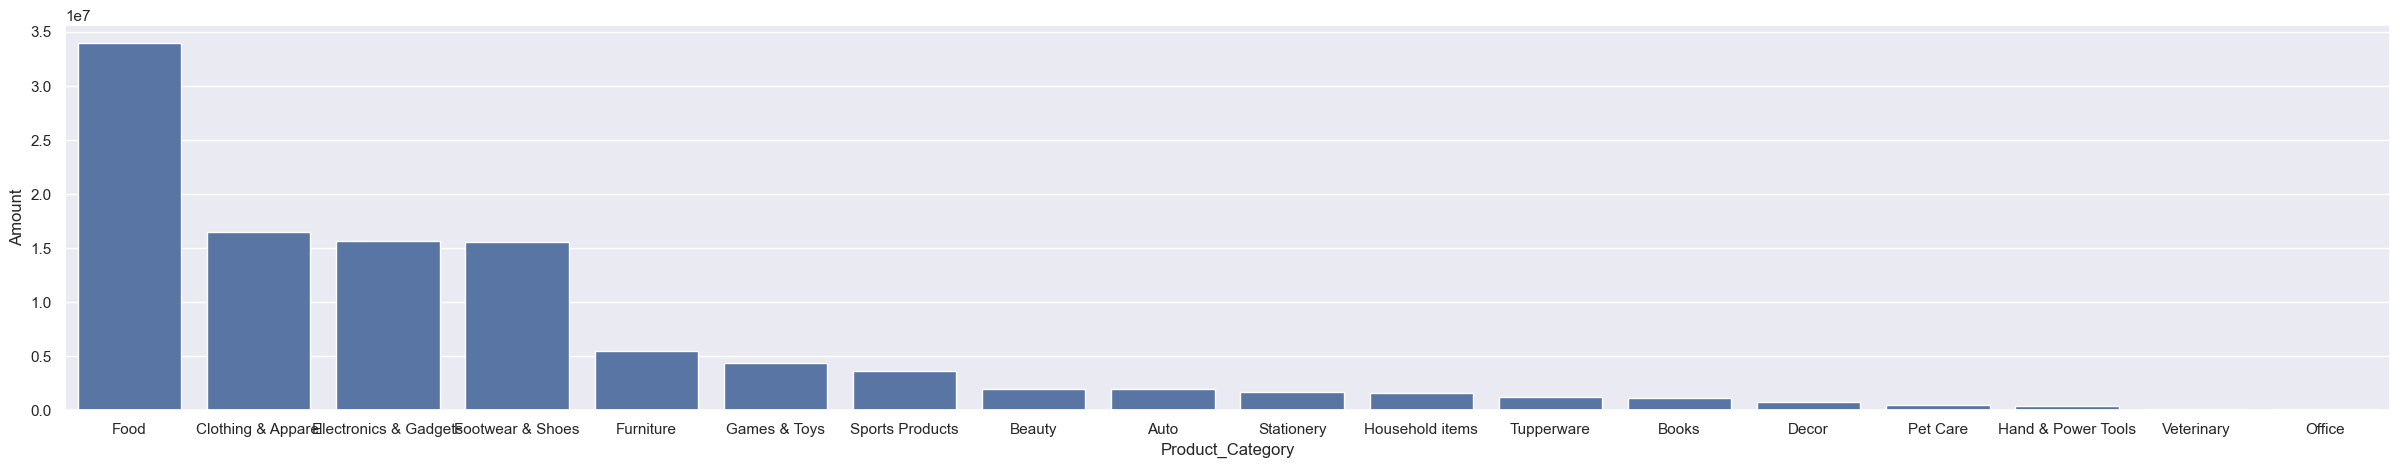

In [10]:
sales_state= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data= sales_state,x='Product_Category', y='Amount')

- **From the above graphs we can say that the sold products are from Food,Footwear and Electronics Category.**

**Conclusion:**

Married Women age group 26-35yrs from UP, Maharashtra,and Karnataka working in IT, Aviation and Healthcare are more likely to buy products from Food,clothing and electronics category. 

*******Conclusion of the EDA Project*******


***This EDA on Diwali sales data provides valuable insights into customer demographics, purchasing behavior, and regional preferences. Key findings 
include dominant customer segments, popular product categories, and peak sales trends. These insights can help businesses optimize marketing strategies,
inventory management, and sales forecasting for better profitability during the festive season.***